In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import requests
import json
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression 


In [2]:
# Load the CSV file from Kaggle into Pandas DataFrame
top_songs = pd.read_csv("Resources/10years_top10s.csv")

top_songs

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


## Step 1: Filter the above dataframe for years 2010 - 2012

In [3]:
top_songs = pd.read_csv("Resources/10years_top10s.csv")

# Filter the data for the years 2010, 2011, and 2012
filtered_data = top_songs[top_songs['year'].isin([2010, 2011, 2012])]

# Group the filtered data by title
grouped_data = filtered_data.groupby('title')

# Display the first 5 rows of the grouped dataframe
grouped_data.head()


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,Don't Stop the Party (feat. TJR),Pitbull,dance pop,2012,127,96,72,-4,38,95,206,1,9,59
135,136,You Da One,Rihanna,barbadian pop,2012,127,72,70,-5,13,86,200,50,4,57
136,137,Stereo Hearts (feat. Adam Levine),Gym Class Heroes,dance pop,2012,90,80,65,-3,27,80,211,3,10,54
137,138,It Will Rain,Bruno Mars,pop,2012,150,84,58,-7,8,48,258,34,5,38


In [4]:
# Clean grouped_data removing any columns that are too out of range to be useful.
top_songs.drop(['live', 'val', 'acous', 'pop'], axis=1)


,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,dur,spch
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,217,4
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,263,23
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,200,14
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,295,4
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,221,4
...,...,...,...,...,...,...,...,...,...,...,...
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,176,3
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,206,12
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,260,34
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,217,7


In [5]:
top_songs = top_songs.reset_index(drop=True)


In [6]:
print(top_songs.columns)

Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')


In [7]:
top_songs = top_songs.rename(columns={'title': 'Title', 'artist': 'Artist', 'top genre': 'Genre', 'year': 'Year', 'bpm': 'BPM', 'nrgy': 'Energy', 'dnce': 'Dance', 'dB': 'Decibels (dB)', 'live': 'Live', 'val': 'Valence', 'dur': 'Duration', 'acous': 'Acousticness', 'spch': 'Speechiness', 'pop': 'Popularity'})
print(top_songs.columns)

Index(['Unnamed: 0', 'Title', 'Artist', 'Genre', 'Year', 'BPM', 'Energy',
       'Dance', 'Decibels (dB)', 'Live', 'Valence', 'Duration', 'Acousticness',
       'Speechiness', 'Popularity'],
      dtype='object')


In [8]:
top_songs.head(5)

,Unnamed: 0,Title,Artist,Genre,Year,BPM,Energy,Dance,Decibels (dB),Live,Valence,Duration,Acousticness,Speechiness,Popularity
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [10]:
top_songs = top_songs.set_index('Title')
top_songs = top_songs.drop('Unnamed: 0', axis=1)

In [11]:
top_songs.head(5)

,Artist,Genre,Year,BPM,Energy,Dance,Decibels (dB),Live,Valence,Duration,Acousticness,Speechiness,Popularity
Title,,,,,,,,,,,,,
"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


,index,Title,Artist,Genre,Year,BPM,Energy,Dance,Decibels (dB),Live,Valence,Duration,Acousticness,Speechiness,Popularity
0,0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## Step 2: Create a bar graph for the top genres for each of the years from the filtered data.  Also, create and plot linear regression for each of the music metric columns.

### Bar Graph for Top Genres in 2010 Spotify Downloads.

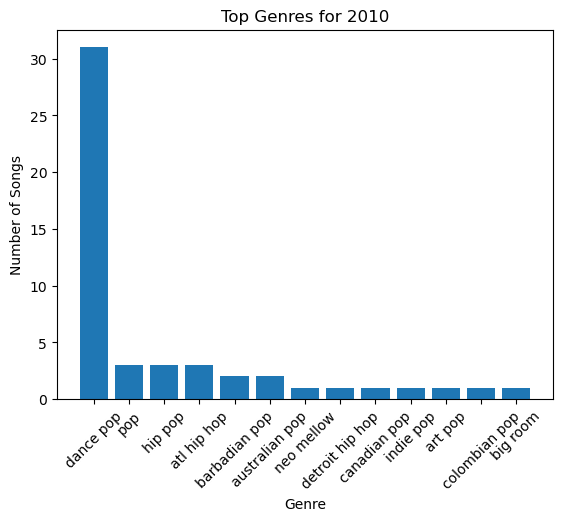

In [14]:
# Filter the data for year 2010
top_songs_2010 = top_songs[top_songs['Year'] == 2010]

# Get the value counts for the 'top genre' column
genre_counts = top_songs_2010['Genre'].value_counts()

# Create a bar graph
fig, ax = plt.subplots()
ax.bar(genre_counts.index, genre_counts.values)
ax.set_title('Top Genres for 2010')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()

## Analyzing music metrics for 2010: 
### BPM metric for top genre. 

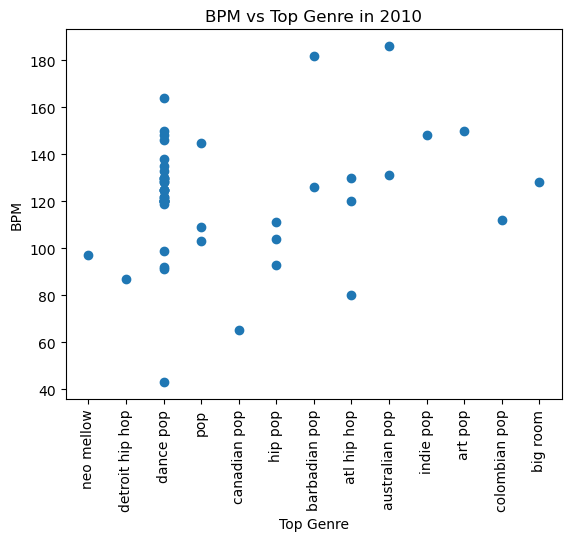

In [16]:
# Create scatter plot
plt.scatter(x=top_songs_2010['Genre'], y=top_songs_2010['BPM'])

# Set axis labels and title
plt.xlabel('Top Genre')
plt.xticks(rotation=90)
plt.ylabel('BPM')
plt.title('BPM vs Top Genre in 2010')

# Show plot
plt.show()

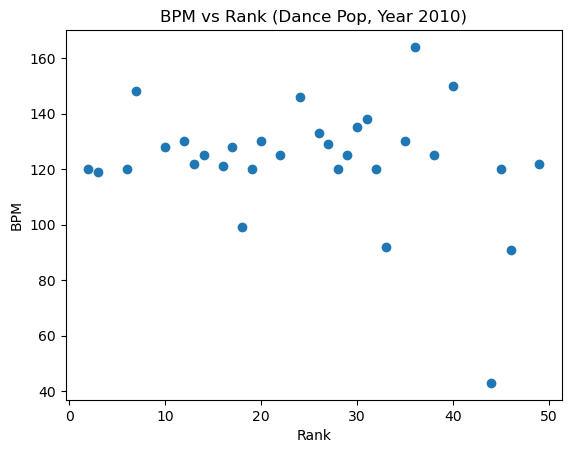

In [18]:
# Filter data for 'dance pop' genre
dance_pop = top_songs_2010[top_songs_2010['Genre'] == 'dance pop']

# Create scatter plot
plt.scatter(x=dance_pop.index, y=dance_pop['BPM'])

# Set axis labels and title
plt.xlabel('Rank')
plt.ylabel('BPM')
plt.title('BPM vs Rank (Dance Pop, Year 2010)')

# Show plot
plt.show()


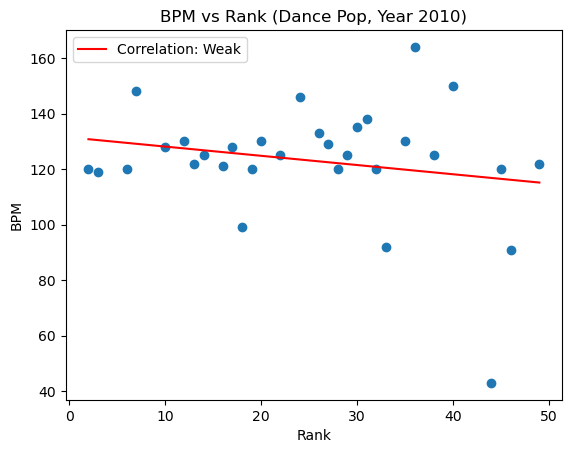

In [20]:
from scipy.stats import linregress

# Subset the data for the dance pop genre
dance_pop = top_songs_2010[top_songs_2010['Genre'] == 'dance pop']

# Create a scatter plot of BPM vs Rank
plt.scatter(x=dance_pop.index, y=dance_pop['BPM'])

# Add axis labels and title
plt.xlabel('Rank')
plt.ylabel('BPM')
plt.title('BPM vs Rank (Dance Pop, Year 2010)')

# Add a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(dance_pop.index, dance_pop['BPM'])
plt.plot(dance_pop.index, intercept + slope*dance_pop.index, color='red', label='Correlation: Strong' if abs(r_value) >= 0.7 else 'Correlation: Weak')

# Add a legend
plt.legend()

# Display the plot
plt.show()


## Linear Regression models of music metrics for 2010.

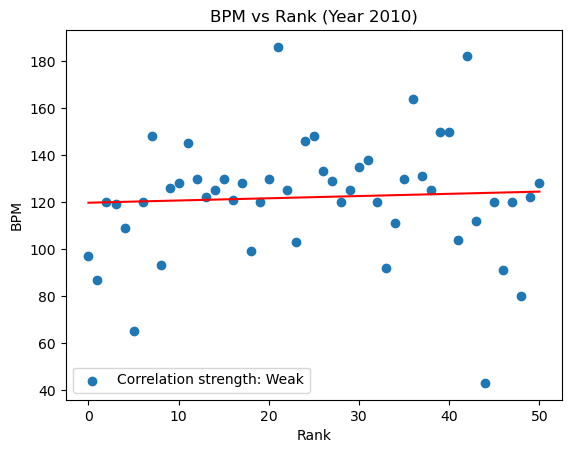

In [21]:
# Create scatter plot
plt.scatter(x=top_songs_2010.index, y=top_songs_2010['BPM'])

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(top_songs_2010.index, top_songs_2010['BPM'])
plt.plot(top_songs_2010.index, intercept + slope*top_songs_2010.index, color='red')

# Set axis labels and title
plt.xlabel('Rank')
plt.ylabel('BPM')
plt.title('BPM vs Rank (Year 2010)')

# Add legend indicating correlation strength
if abs(r_value) > 0.7:
    correlation_strength = 'Strong'
else:
    correlation_strength = 'Weak'
legend_text = f'Correlation strength: {correlation_strength}'
plt.legend([legend_text])

# Show plot
plt.show()

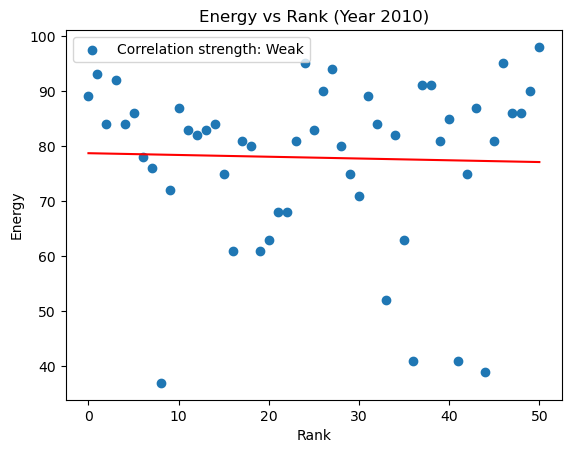

In [22]:
# Create scatter plot
plt.scatter(x=top_songs_2010.index, y=top_songs_2010['Energy'])

# Add linear regression line
slope, intercept, r_value, p_value, std_err = linregress(top_songs_2010.index, top_songs_2010['Energy'])
plt.plot(top_songs_2010.index, intercept + slope*top_songs_2010.index, color='red')

# Set axis labels and title
plt.xlabel('Rank')
plt.ylabel('Energy')
plt.title('Energy vs Rank (Year 2010)')

# Add legend indicating correlation strength
if abs(r_value) > 0.7:
    correlation_strength = 'Strong'
else:
    correlation_strength = 'Weak'
legend_text = f'Correlation strength: {correlation_strength}'
plt.legend([legend_text])

# Show plot
plt.show()

In [ ]:
# Show a bar graph for the top genres of 2011.
# Filter the data for year 2010
top_songs_2011 = top_songs[top_songs['year'] == 2011]

# Get the value counts for the 'top genre' column
genre_counts = top_songs_2011['top genre'].value_counts()

# Create a bar graph
fig, ax = plt.subplots()
ax.bar(genre_counts.index, genre_counts.values)
ax.set_title('Top Genres for 2011')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Songs')
plt.xticks(rotation=45)
plt.show()
